###Needed Libraries

In [116]:
import pandas as pd

In [117]:
import matplotlib.pyplot as plt

In [118]:
import networkx as nx

In [119]:
import numpy as np

In [120]:
from scipy.stats import zscore

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Load data

In [122]:
oil_data = pd.read_csv('/content/drive/MyDrive/Факултет/DataScience/Data Science Project/oil.csv')
oil_data

,date,value
0,2010-07-06,71.96
1,2010-07-07,74.05
2,2010-07-08,75.46
3,2010-07-09,76.08
4,2010-07-12,74.93
...,...,...
3305,17.7.2023,NaN
3306,18.7.2023,NaN
3307,19.7.2023,NaN
3308,20.7.2023,NaN


In [123]:
gold_data = pd.read_csv('/content/drive/MyDrive/Факултет/DataScience/Data Science Project/gold.csv')
gold_data

,date,value
0,2010-07-05,1208.50
1,2010-07-06,1210.75
2,2010-07-07,1186.00
3,2010-07-08,1201.25
4,2010-07-09,1196.25
...,...,...
3333,17.7.2023,NaN
3334,18.7.2023,NaN
3335,19.7.2023,NaN
3336,20.7.2023,NaN


In [124]:
gas_data = pd.read_csv('/content/drive/MyDrive/Факултет/DataScience/Data Science Project/natural-gas.csv')
gas_data

,date,value
0,2010-08-09,4.52
1,2010-08-10,4.43
2,2010-08-11,4.38
3,2010-08-12,4.42
4,2010-08-13,4.35
...,...,...
3301,18.8.2023,NaN
3302,19.8.2023,NaN
3303,20.8.2023,NaN
3304,21.8.2023,NaN


###Clean and format data


In [125]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3310 non-null   object 
 1    value  3289 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.8+ KB


In [126]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3338 non-null   object 
 1    value  3317 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.3+ KB


In [127]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3306 non-null   object 
 1    value  3285 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.8+ KB


In [128]:
oil_data['date'] = pd.to_datetime(oil_data['date'], dayfirst=True, errors='coerce')
gold_data['date'] = pd.to_datetime(gold_data['date'], errors='coerce')
gas_data['date'] = pd.to_datetime(gas_data['date'], errors='coerce')

<ipython-input-128-b20c7b8999f1>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  gold_data['date'] = pd.to_datetime(gold_data['date'], errors='coerce')
<ipython-input-128-b20c7b8999f1>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  gas_data['date'] = pd.to_datetime(gas_data['date'], errors='coerce')


In [129]:
merged_data = pd.merge(gas_data, oil_data, on='date', how='left')
merged_data = pd.merge(merged_data, gold_data, on='date', how='left')

In [130]:
merged_data.columns = ['date', 'gas_value', 'oil_value', 'gold_value']

In [131]:
merged_data.sort_values(by='date', inplace=True)

In [132]:
print(merged_data)

           date  gas_value  oil_value  gold_value
0    2010-08-09       4.52      81.46     1206.00
1    2010-08-10       4.43      80.24     1196.75
2    2010-08-11       4.38      78.09     1198.00
3    2010-08-12       4.42      75.68     1200.00
4    2010-08-13       4.35      75.39     1215.00
...         ...        ...        ...         ...
3308 2023-08-22        NaN        NaN         NaN
3295 2023-09-08        NaN        NaN         NaN
3296 2023-10-08        NaN        NaN         NaN
3297 2023-11-08        NaN        NaN         NaN
3298 2023-12-08        NaN        NaN         NaN

[3309 rows x 4 columns]


In [133]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 3298
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3309 non-null   datetime64[ns]
 1   gas_value   3288 non-null   float64       
 2   oil_value   3243 non-null   float64       
 3   gold_value  3218 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 129.3 KB


In [134]:
merged_data.dropna(subset=['gas_value'], inplace=True)
merged_data.dropna(subset=['oil_value'], inplace=True)
merged_data.dropna(subset=['gold_value'], inplace=True)

In [135]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3198 entries, 0 to 3266
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3198 non-null   datetime64[ns]
 1   gas_value   3198 non-null   float64       
 2   oil_value   3198 non-null   float64       
 3   gold_value  3198 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 124.9 KB


In [136]:
merged_data

,date,gas_value,oil_value,gold_value
0,2010-08-09,4.52,81.46,1206.0000
1,2010-08-10,4.43,80.24,1196.7500
2,2010-08-11,4.38,78.09,1198.0000
3,2010-08-12,4.42,75.68,1200.0000
4,2010-08-13,4.35,75.39,1215.0000
...,...,...,...,...
3262,2023-06-26,2.62,69.53,1921.7000
3263,2023-06-27,2.68,68.03,1913.7017
3264,2023-06-28,2.71,69.56,1907.4425
3265,2023-06-29,2.40,69.59,1908.2185


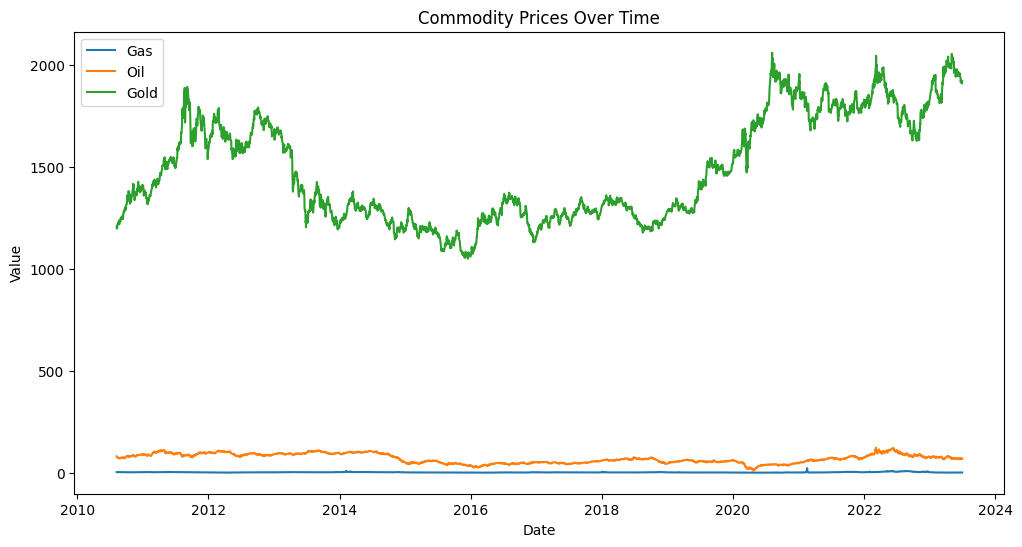

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(merged_data['date'], merged_data['gas_value'], label='Gas')
plt.plot(merged_data['date'], merged_data['oil_value'], label='Oil')
plt.plot(merged_data['date'], merged_data['gold_value'], label='Gold')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Commodity Prices Over Time')
plt.legend()
plt.show()


In [138]:
std_data = merged_data

numerical_columns = ['gas_value', 'oil_value', 'gold_value']

std_data[numerical_columns] = (merged_data [numerical_columns] - merged_data [numerical_columns].mean()) / merged_data [numerical_columns].std()

std_data

,date,gas_value,oil_value,gold_value
0,2010-08-09,0.813413,0.458663,-1.066685
1,2010-08-10,0.747986,0.404936,-1.102385
2,2010-08-11,0.711637,0.310253,-1.097561
3,2010-08-12,0.740716,0.204120,-1.089842
4,2010-08-13,0.689829,0.191349,-1.031950
...,...,...,...,...
3262,2023-06-26,-0.567822,-0.066717,1.695537
3263,2023-06-27,-0.524204,-0.132775,1.664668
3264,2023-06-28,-0.502395,-0.065396,1.640511
3265,2023-06-29,-0.727754,-0.064075,1.643506


###EDA

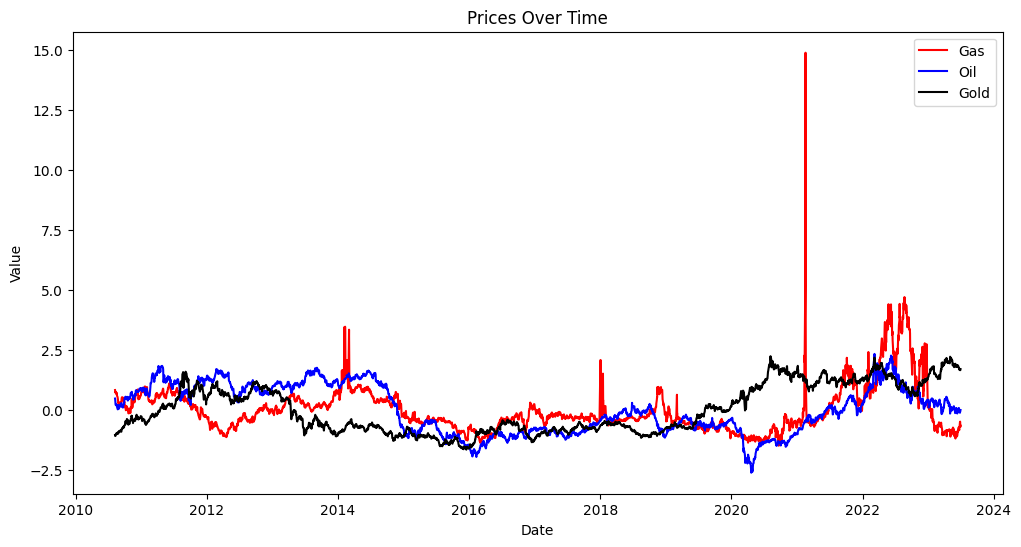

In [139]:
plt.figure(figsize=(12, 6))

plt.plot(std_data['date'], std_data['gas_value'], label='Gas', color="red")
plt.plot(std_data['date'], std_data['oil_value'], label='Oil', color="blue")
plt.plot(std_data['date'], std_data['gold_value'], label='Gold', color="black")

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prices Over Time')
plt.legend()
plt.show()

In [140]:
z_scores = np.abs(zscore(std_data[['gas_value', 'oil_value', 'gold_value']], axis=0))

threshold = 3

outlier_rows = np.any(z_scores > threshold, axis=1)

c_std_data = std_data[~outlier_rows]

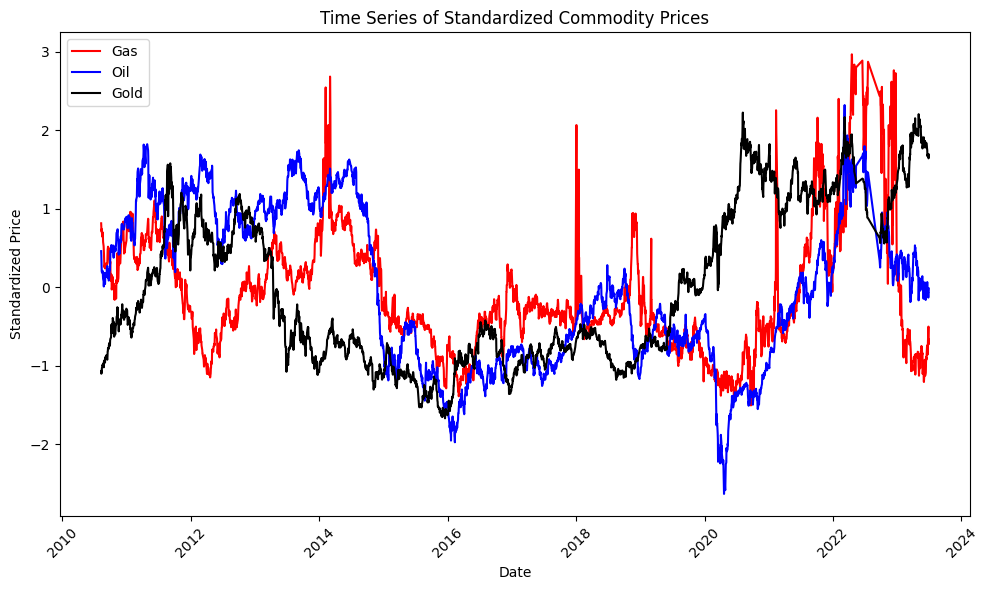

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(c_std_data['date'], c_std_data['gas_value'], label='Gas', color='red')
plt.plot(c_std_data['date'], c_std_data['oil_value'], label='Oil', color='blue')
plt.plot(c_std_data['date'], c_std_data['gold_value'], label='Gold', color='black')
plt.xlabel('Date')
plt.ylabel('Standardized Price')
plt.title('Time Series of Standardized Commodity Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation Matrix

In [142]:
correlation_matrix = merged_data[['gas_value', 'oil_value', 'gold_value']].corr()
print(correlation_matrix)

            gas_value  oil_value  gold_value
gas_value    1.000000   0.554691    0.177036
oil_value    0.554691   1.000000    0.251252
gold_value   0.177036   0.251252    1.000000


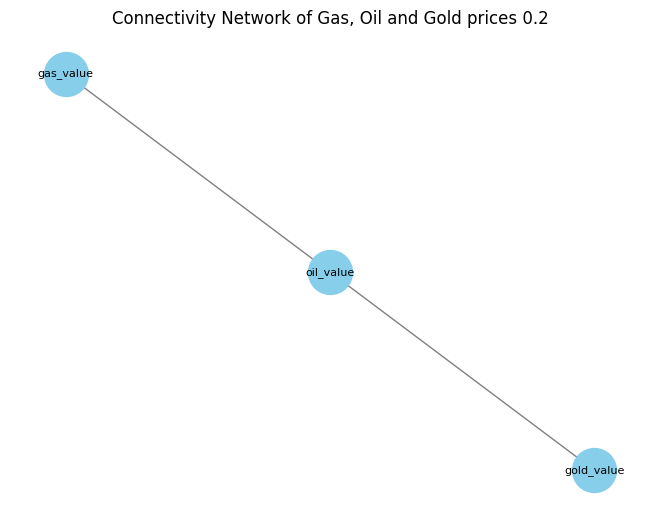

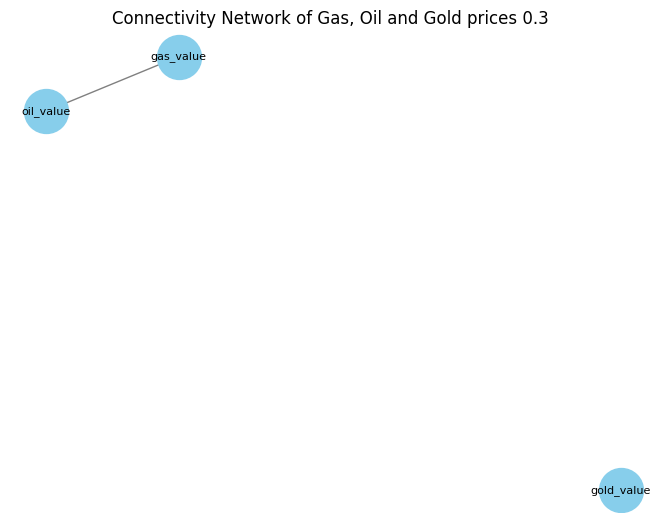

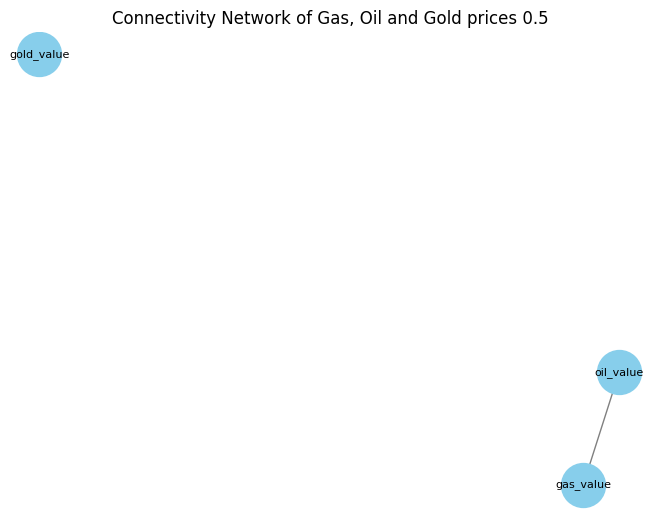

In [143]:
threshold_range = [0.2, 0.3, 0.5]

for threshold in threshold_range:
    G = nx.Graph()

    for commodity in ['gas_value', 'oil_value', 'gold_value']:
        G.add_node(commodity)

    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_color='black', node_color='skyblue', edge_color='gray')
    plt.title(f"Connectivity Network of Gas, Oil and Gold prices {threshold}")
    plt.show()

###Threshold of 0.2

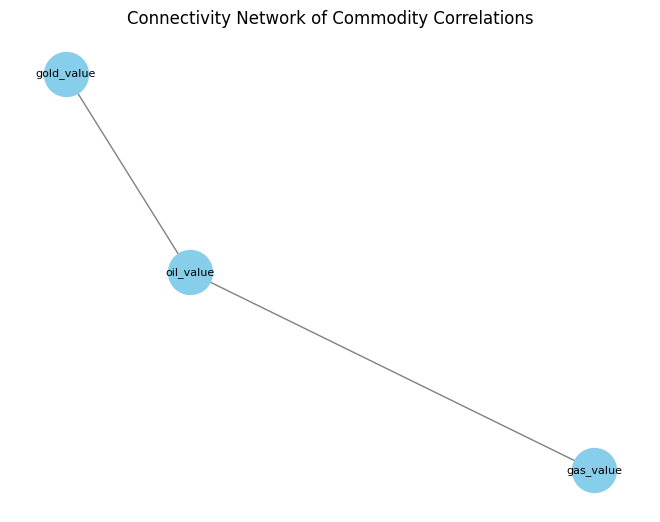

In [144]:
threshold = 0.2
G = nx.Graph()

for commodity in ['gas_value', 'oil_value', 'gold_value']:
    G.add_node(commodity)

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_color='black', node_color='skyblue', edge_color='gray')
plt.title('Connectivity Network of Commodity Correlations')
plt.show()

In [145]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)

Degree Centrality: {'gas_value': 0.5, 'oil_value': 1.0, 'gold_value': 0.5}
Betweenness Centrality: {'gas_value': 0.0, 'oil_value': 1.0, 'gold_value': 0.0}
Closeness Centrality: {'gas_value': 0.6666666666666666, 'oil_value': 1.0, 'gold_value': 0.6666666666666666}


In [146]:
most_connected_commodity = max(degree_centrality, key=degree_centrality.get)
bridge_commodity = max(betweenness_centrality, key=betweenness_centrality.get)
close_commodity = max(closeness_centrality, key=closeness_centrality.get)

print("Most Connected Commodity:", most_connected_commodity)
print("Bridge Commodity:", bridge_commodity)
print("Close Commodity:", close_commodity)

Most Connected Commodity: oil_value
Bridge Commodity: oil_value
Close Commodity: oil_value


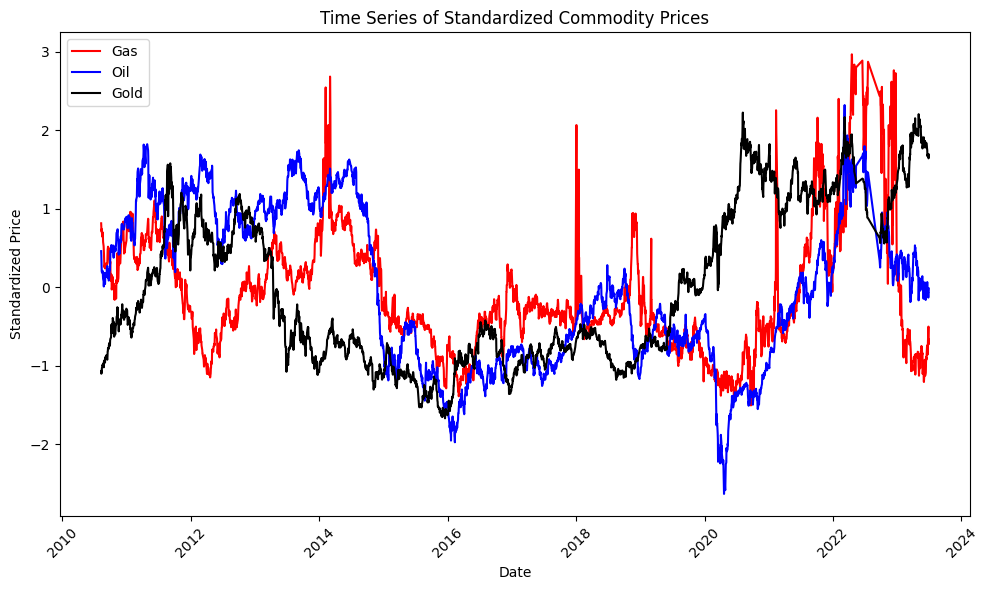

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(c_std_data['date'], c_std_data['gas_value'], label='Gas', color='red')
plt.plot(c_std_data['date'], c_std_data['oil_value'], label='Oil', color='blue')
plt.plot(c_std_data['date'], c_std_data['gold_value'], label='Gold', color='black')
plt.xlabel('Date')
plt.ylabel('Standardized Price')
plt.title('Time Series of Standardized Commodity Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [148]:
x_labels = ['gas_value', 'oil_value', 'gold_value']

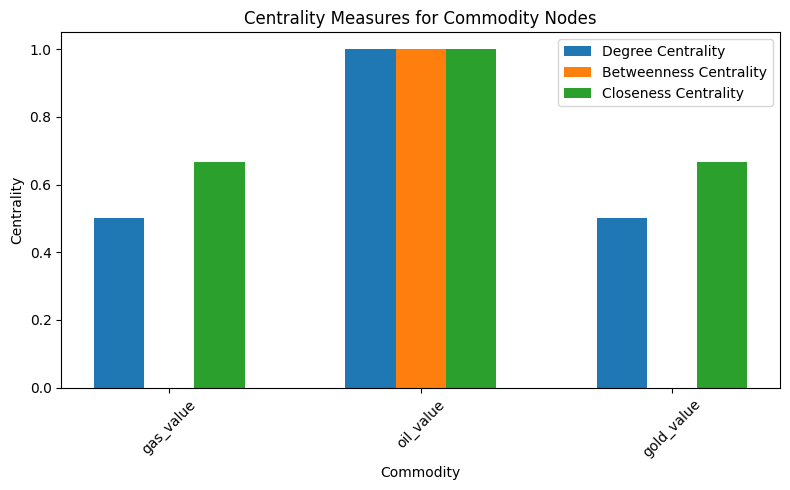

In [149]:
bar_width = 0.2
x_positions = np.arange(len(x_labels))

plt.figure(figsize=(8, 5))
plt.bar(x_positions - bar_width, [degree_centrality[node] for node in x_labels], label='Degree Centrality', width=bar_width)
plt.bar(x_positions, [betweenness_centrality[node] for node in x_labels], label='Betweenness Centrality', width=bar_width)
plt.bar(x_positions + bar_width, [closeness_centrality[node] for node in x_labels], label='Closeness Centrality', width=bar_width)
plt.xlabel('Commodity')
plt.ylabel('Centrality')
plt.title('Centrality Measures for Commodity Nodes')
plt.legend()
plt.xticks(x_positions, x_labels, rotation=45)
plt.tight_layout()
plt.show()


###Threshold of 0.5

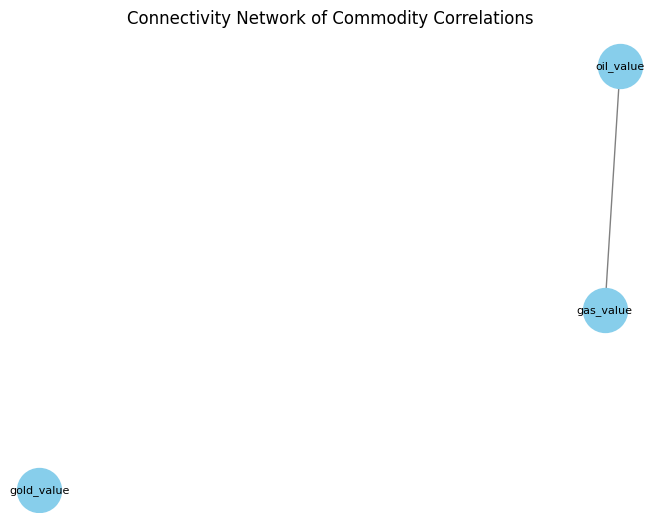

In [150]:
threshold = 0.5
G = nx.Graph()

for commodity in ['gas_value', 'oil_value', 'gold_value']:
    G.add_node(commodity)

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_color='black', node_color='skyblue', edge_color='gray')
plt.title('Connectivity Network of Commodity Correlations')
plt.show()

In [151]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)

Degree Centrality: {'gas_value': 0.5, 'oil_value': 0.5, 'gold_value': 0.0}
Betweenness Centrality: {'gas_value': 0.0, 'oil_value': 0.0, 'gold_value': 0.0}
Closeness Centrality: {'gas_value': 0.5, 'oil_value': 0.5, 'gold_value': 0.0}


In [152]:
most_connected_commodity = max(degree_centrality, key=degree_centrality.get)
bridge_commodity = max(betweenness_centrality, key=betweenness_centrality.get)
close_commodity = max(closeness_centrality, key=closeness_centrality.get)

print("Most Connected Commodity:", most_connected_commodity)
print("Bridge Commodity:", bridge_commodity)
print("Close Commodity:", close_commodity)

Most Connected Commodity: gas_value
Bridge Commodity: gas_value
Close Commodity: gas_value


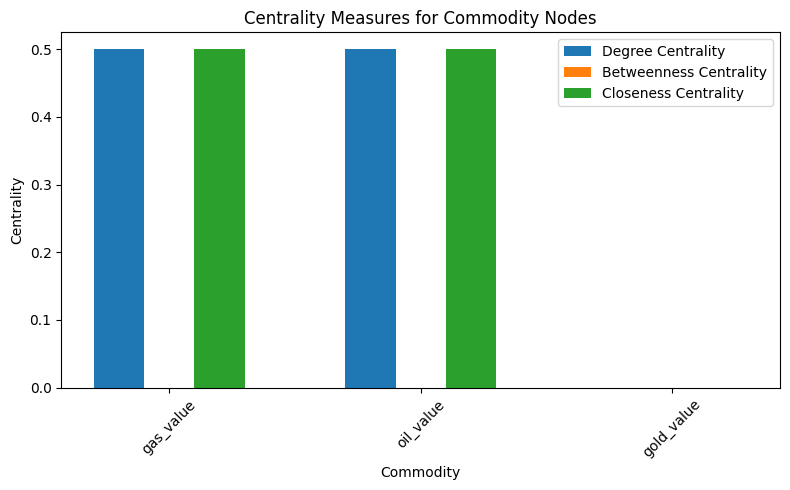

In [153]:
bar_width = 0.2
x_positions = np.arange(len(x_labels))

plt.figure(figsize=(8, 5))
plt.bar(x_positions - bar_width, [degree_centrality[node] for node in x_labels], label='Degree Centrality', width=bar_width)
plt.bar(x_positions, [betweenness_centrality[node] for node in x_labels], label='Betweenness Centrality', width=bar_width)
plt.bar(x_positions + bar_width, [closeness_centrality[node] for node in x_labels], label='Closeness Centrality', width=bar_width)
plt.xlabel('Commodity')
plt.ylabel('Centrality')
plt.title('Centrality Measures for Commodity Nodes')
plt.legend()
plt.xticks(x_positions, x_labels, rotation=45)
plt.tight_layout()
plt.show()
